In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Self Collect Dataset without pre processing**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set paths
data_dir_train = "/content/drive/MyDrive/Label/Label/train"
data_dir_test = "/content/drive/MyDrive/Label/Label/test"
labels_dict = {"Level1": 0, "Level2": 1, "Level3": 2}

IMG_SIZE = (64, 64)  # Maintain resizing only for consistent input dimensions

# Load images without preprocessing
def load_data(data_dir):
    X = []  # Features (raw images)
    y = []  # Labels

    for label_name, label_id in labels_dict.items():
        class_dir = os.path.join(data_dir, label_name)
        if not os.path.exists(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue

            # Resize image to maintain consistent dimensions
            img = cv2.resize(img, IMG_SIZE)
            img = img.flatten()  # Convert to 1D vector

            X.append(img)
            y.append(label_id)

    return np.array(X), np.array(y)

# Call function with display option
X_train, y_train = load_data(data_dir_train)
X_test, y_test = load_data(data_dir_test)

# Normalize features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train_pca, y_train)

# Predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5192307692307693
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.62      0.73      0.67        22
           2       0.40      0.59      0.48        17

    accuracy                           0.52        52
   macro avg       0.67      0.46      0.43        52
weighted avg       0.64      0.52      0.47        52



# **Self Collect Dataset with pre processing**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set paths
data_dir_train = "/content/drive/MyDrive/Label/Label/train"
data_dir_test = "/content/drive/MyDrive/Label/Label/test"
labels_dict = {"Level1": 0, "Level2": 1, "Level3": 2}

# Feature extraction parameters
COLOR_BINS = 32
IMG_SIZE = (64, 64)  # Image resizing dimensions

def extract_features_with_background_removal(img, display_images):

    color_features = extract_color_histogram(img)
    texture_features = extract_texture_features(img)
    features = np.concatenate((color_features, texture_features))

    return features

# Extract color histogram features
def extract_color_histogram(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [COLOR_BINS, COLOR_BINS, COLOR_BINS], [0, 256, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Placeholder for texture feature extraction (can be extended)
def extract_texture_features(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img.flatten()[:COLOR_BINS]  # Simplified feature example

# Load and preprocess data using new feature extraction
def load_data_and_extract_features_improved(data_dir, display_images=False):
    X = []
    y = []

    for label_name, label_id in labels_dict.items():
        class_dir = os.path.join(data_dir, label_name)
        if not os.path.exists(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img_resized = cv2.resize(img, IMG_SIZE)

            features = extract_features_with_background_removal(img_resized, display_images)
            X.append(features)
            y.append(label_id)

    return np.array(X), np.array(y)

# Call function with display option
X_train, y_train = load_data_and_extract_features_improved(data_dir_train, display_images=True)
X_test, y_test = load_data_and_extract_features_improved(data_dir_test, display_images=True)

# Normalize features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train_pca, y_train)

# Predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7884615384615384
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.68      0.95      0.79        22
           2       0.94      1.00      0.97        17

    accuracy                           0.79        52
   macro avg       0.87      0.73      0.71        52
weighted avg       0.85      0.79      0.75        52



# **Self Collect Dataset with pre processing (remove_bg)**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set paths
data_dir_train = "/content/drive/MyDrive/Label/Label/train"
data_dir_test = "/content/drive/MyDrive/Label/Label/test"
labels_dict = {"Level1": 0, "Level2": 1, "Level3": 2}

# Feature extraction parameters
COLOR_BINS = 32
IMG_SIZE = (64, 64)  # Image resizing dimensions

def remove_background(img):
    # Convert to grayscale and apply binary thresholding
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Create mask for grabCut
    mask = np.zeros(img.shape[:2], np.uint8)
    mask[binary_mask == 255] = cv2.GC_PR_BGD
    mask[binary_mask == 0] = cv2.GC_PR_FGD

    # Define models
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Run grabCut with the new mask
    cv2.grabCut(img, mask, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)

    # Modify mask to extract foreground
    mask2 = np.where((mask == cv2.GC_BGD) | (mask == cv2.GC_PR_BGD), 0, 1).astype('uint8')
    img_bg_removed = img * mask2[:, :, np.newaxis]

    return img_bg_removed

def extract_features_with_background_removal(img, display_images):
    img_bg_removed = remove_background(img)

    if display_images:
        fig, axes = plt.subplots(1, 1, figsize=(4, 4))

        axes.imshow(cv2.cvtColor(img_bg_removed, cv2.COLOR_BGR2RGB))
        axes.set_title('Background Remove Image')
        axes.axis('off')

        plt.show()
        plt.close(fig)

    color_features = extract_color_histogram(img_bg_removed)
    texture_features = extract_texture_features(img_bg_removed)
    features = np.concatenate((color_features, texture_features))

    return features



# Extract color histogram features
def extract_color_histogram(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [COLOR_BINS, COLOR_BINS, COLOR_BINS], [0, 256, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Placeholder for texture feature extraction (can be extended)
def extract_texture_features(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img.flatten()[:COLOR_BINS]  # Simplified feature example

# Load and preprocess data using new feature extraction
def load_data_and_extract_features_improved(data_dir, display_images=False):
    X = []
    y = []

    for label_name, label_id in labels_dict.items():
        class_dir = os.path.join(data_dir, label_name)
        if not os.path.exists(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img_resized = cv2.resize(img, IMG_SIZE)

            features = extract_features_with_background_removal(img_resized, display_images)
            X.append(features)
            y.append(label_id)

    return np.array(X), np.array(y)

# Call function with display option
X_train, y_train = load_data_and_extract_features_improved(data_dir_train, display_images=False)
X_test, y_test = load_data_and_extract_features_improved(data_dir_test, display_images=False)

# Normalize features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train_pca, y_train)

# Predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8461538461538461
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.76      1.00      0.86        22
           2       0.94      0.88      0.91        17

    accuracy                           0.85        52
   macro avg       0.90      0.81      0.82        52
weighted avg       0.88      0.85      0.84        52



# **Self Collect Dataset with pre processing (img_enhance)**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set paths
data_dir_train = "/content/drive/MyDrive/Label/Label/train"
data_dir_test = "/content/drive/MyDrive/Label/Label/test"
labels_dict = {"Level1": 0, "Level2": 1, "Level3": 2}

# Feature extraction parameters
COLOR_BINS = 32
IMG_SIZE = (64, 64)  # Image resizing dimensions

def enhance_image(img):
    enhance_img = cv2.convertScaleAbs(img, alpha=1.5, beta=20)
    return enhance_img

def extract_features_with_background_removal(img, display_images):
    img_enhanced = enhance_image(img)

    color_features = extract_color_histogram(img_enhanced)
    texture_features = extract_texture_features(img_enhanced)
    features = np.concatenate((color_features, texture_features))

    if display_images:
        fig, axes = plt.subplots(1, 1, figsize=(4,4))

        axes[0].imshow(cv2.cvtColor(img_enhanced, cv2.COLOR_BGR2RGB))
        axes[0].set_title('Enhanced Image')
        axes[0].axis('off')

        plt.show()
        plt.close(fig)

    return features

# Extract color histogram features
def extract_color_histogram(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [COLOR_BINS, COLOR_BINS, COLOR_BINS], [0, 256, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Placeholder for texture feature extraction (can be extended)
def extract_texture_features(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img.flatten()[:COLOR_BINS]  # Simplified feature example

# Load and preprocess data using new feature extraction
def load_data_and_extract_features_improved(data_dir, display_images=False):
    X = []
    y = []

    for label_name, label_id in labels_dict.items():
        class_dir = os.path.join(data_dir, label_name)
        if not os.path.exists(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img_resized = cv2.resize(img, IMG_SIZE)

            features = extract_features_with_background_removal(img_resized, display_images)
            X.append(features)
            y.append(label_id)

    return np.array(X), np.array(y)

# Call function with display option
X_train, y_train = load_data_and_extract_features_improved(data_dir_train, display_images=False)
X_test, y_test = load_data_and_extract_features_improved(data_dir_test, display_images=False)

# Normalize features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train_pca, y_train)

# Predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8076923076923077
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.72      0.95      0.82        22
           2       0.88      0.88      0.88        17

    accuracy                           0.81        52
   macro avg       0.87      0.77      0.78        52
weighted avg       0.84      0.81      0.79        52



# **Self Collect Dataset with pre processing (img_sharpen)**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set paths
data_dir_train = "/content/drive/MyDrive/Label/Label/train"
data_dir_test = "/content/drive/MyDrive/Label/Label/test"
labels_dict = {"Level1": 0, "Level2": 1, "Level3": 2}

# Feature extraction parameters
COLOR_BINS = 32
IMG_SIZE = (64, 64)  # Image resizing dimensions

def sharpen_image(img):
    # Create the sharpening kernel
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    # Sharpen the image
    sharpened_image = cv2.filter2D(img, -1, kernel)
    return sharpened_image

def extract_features_with_background_removal(img, display_images):
    img_sharpened = sharpen_image(img)

    color_features = extract_color_histogram(img_sharpened)
    texture_features = extract_texture_features(img_sharpened)
    features = np.concatenate((color_features, texture_features))

    if display_images:
        fig, axes = plt.subplots(1, 1, figsize=(4, 4))

        axes[0].imshow(cv2.cvtColor(img_sharpened, cv2.COLOR_BGR2RGB))
        axes[0].set_title('Sharpened Image')
        axes[0].axis('off')

        plt.show()
        plt.close(fig)

    return features

# Extract color histogram features
def extract_color_histogram(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [COLOR_BINS, COLOR_BINS, COLOR_BINS], [0, 256, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Placeholder for texture feature extraction (can be extended)
def extract_texture_features(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img.flatten()[:COLOR_BINS]  # Simplified feature example

# Load and preprocess data using new feature extraction
def load_data_and_extract_features_improved(data_dir, display_images=False):
    X = []
    y = []

    for label_name, label_id in labels_dict.items():
        class_dir = os.path.join(data_dir, label_name)
        if not os.path.exists(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img_resized = cv2.resize(img, IMG_SIZE)

            features = extract_features_with_background_removal(img_resized, display_images)
            X.append(features)
            y.append(label_id)

    return np.array(X), np.array(y)

# Call function with display option
X_train, y_train = load_data_and_extract_features_improved(data_dir_train, display_images=False)
X_test, y_test = load_data_and_extract_features_improved(data_dir_test, display_images=False)

# Normalize features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train_pca, y_train)

# Predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.65      0.91      0.75        22
           2       0.89      1.00      0.94        17

    accuracy                           0.75        52
   macro avg       0.85      0.69      0.66        52
weighted avg       0.82      0.75      0.69        52



# **Public Dattaset without pre processing**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set paths
data_dir_train = "/content/drive/MyDrive/outfolder/outfolder/train"
data_dir_test = "/content/drive/MyDrive/outfolder/outfolder/test"
labels_dict = {"Level1": 0, "Level2": 1, "Level3": 2, "Level4": 3, "Level5": 4}

IMG_SIZE = (64, 64)  # Maintain resizing only for consistent input dimensions

# Load images without preprocessing
def load_data(data_dir):
    X = []  # Features (raw images)
    y = []  # Labels

    for label_name, label_id in labels_dict.items():
        class_dir = os.path.join(data_dir, label_name)
        if not os.path.exists(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue

            # Resize image to maintain consistent dimensions
            img = cv2.resize(img, IMG_SIZE)
            img = img.flatten()  # Convert to 1D vector

            X.append(img)
            y.append(label_id)

    return np.array(X), np.array(y)

# Call function with display option
X_train, y_train = load_data(data_dir_train)
X_test, y_test = load_data(data_dir_test)

# Normalize features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train_pca, y_train)

# Predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6630434782608695
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1071
           1       0.64      0.38      0.48       669
           2       0.62      0.52      0.56       827
           3       0.57      0.72      0.64       989
           4       0.69      0.62      0.65       860

    accuracy                           0.66      4416
   macro avg       0.66      0.63      0.63      4416
weighted avg       0.66      0.66      0.65      4416



# **Public Dataset with pre processing**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set paths
data_dir_train = "/content/drive/MyDrive/outfolder/outfolder/train"
data_dir_test = "/content/drive/MyDrive/outfolder/outfolder/test"
labels_dict = {"Level1": 0, "Level2": 1, "Level3": 2, "Level4": 3, "Level5": 4}

# Feature extraction parameters
COLOR_BINS = 32
IMG_SIZE = (64, 64)  # Image resizing dimensions

def extract_features_with_background_removal(img, display_images):

    color_features = extract_color_histogram(img)
    texture_features = extract_texture_features(img)
    features = np.concatenate((color_features, texture_features))

    return features

# Extract color histogram features
def extract_color_histogram(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [COLOR_BINS, COLOR_BINS, COLOR_BINS], [0, 256, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Placeholder for texture feature extraction (can be extended)
def extract_texture_features(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img.flatten()[:COLOR_BINS]  # Simplified feature example

# Load and preprocess data using new feature extraction
def load_data_and_extract_features_improved(data_dir, display_images=False):
    X = []
    y = []

    for label_name, label_id in labels_dict.items():
        class_dir = os.path.join(data_dir, label_name)
        if not os.path.exists(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img_resized = cv2.resize(img, IMG_SIZE)

            features = extract_features_with_background_removal(img_resized, display_images)
            X.append(features)
            y.append(label_id)

    return np.array(X), np.array(y)

# Call function with display option
X_train, y_train = load_data_and_extract_features_improved(data_dir_train, display_images=False)
X_test, y_test = load_data_and_extract_features_improved(data_dir_test, display_images=False)

# Normalize features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train_pca, y_train)

# Predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7536231884057971
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1071
           1       0.72      0.63      0.67       669
           2       0.72      0.72      0.72       827
           3       0.66      0.73      0.69       989
           4       0.78      0.72      0.75       860

    accuracy                           0.75      4416
   macro avg       0.75      0.74      0.74      4416
weighted avg       0.75      0.75      0.75      4416



# **Public Dataset with pre processing (remove_bg)**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set paths
data_dir_train = "/content/drive/MyDrive/outfolder/outfolder/train"
data_dir_test = "/content/drive/MyDrive/outfolder/outfolder/test"
labels_dict = {"Level1": 0, "Level2": 1, "Level3": 2, "Level4": 3, "Level5": 4}

# Feature extraction parameters
COLOR_BINS = 32
IMG_SIZE = (64, 64)  # Image resizing dimensions

def remove_background(img):
    # Convert to grayscale and apply binary thresholding
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Create mask for grabCut
    mask = np.zeros(img.shape[:2], np.uint8)
    mask[binary_mask == 255] = cv2.GC_PR_BGD
    mask[binary_mask == 0] = cv2.GC_PR_FGD

    # Define models
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Run grabCut with the new mask
    cv2.grabCut(img, mask, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)

    # Modify mask to extract foreground
    mask2 = np.where((mask == cv2.GC_BGD) | (mask == cv2.GC_PR_BGD), 0, 1).astype('uint8')
    img_bg_removed = img * mask2[:, :, np.newaxis]

    return img_bg_removed

def extract_features_with_background_removal(img, display_images):
    img_bg_removed = remove_background(img)

    color_features = extract_color_histogram(img_bg_removed)
    texture_features = extract_texture_features(img_bg_removed)
    features = np.concatenate((color_features, texture_features))

    if display_images:
        fig, axes = plt.subplots(1, 1, figsize=(4, 4))

        axes.imshow(cv2.cvtColor(img_bg_removed, cv2.COLOR_BGR2RGB))
        axes.set_title('Background Remove Image')
        axes.axis('off')

        plt.show()
        plt.close(fig)

    return features

# Extract color histogram features
def extract_color_histogram(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [COLOR_BINS, COLOR_BINS, COLOR_BINS], [0, 256, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Placeholder for texture feature extraction (can be extended)
def extract_texture_features(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img.flatten()[:COLOR_BINS]  # Simplified feature example

# Load and preprocess data using new feature extraction
def load_data_and_extract_features_improved(data_dir, display_images=False):
    X = []
    y = []

    for label_name, label_id in labels_dict.items():
        class_dir = os.path.join(data_dir, label_name)
        if not os.path.exists(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img_resized = cv2.resize(img, IMG_SIZE)

            features = extract_features_with_background_removal(img_resized, display_images)
            X.append(features)
            y.append(label_id)

    return np.array(X), np.array(y)

# Call function with display option
X_train, y_train = load_data_and_extract_features_improved(data_dir_train, display_images=False)
X_test, y_test = load_data_and_extract_features_improved(data_dir_test, display_images=False)

# Normalize features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train_pca, y_train)

# Predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6920289855072463
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1071
           1       0.70      0.59      0.64       669
           2       0.64      0.69      0.67       827
           3       0.58      0.62      0.60       989
           4       0.66      0.58      0.62       860

    accuracy                           0.69      4416
   macro avg       0.69      0.68      0.68      4416
weighted avg       0.69      0.69      0.69      4416



# **Public Dataset with pre processing (img_enhance)**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set paths
data_dir_train = "/content/drive/MyDrive/outfolder/outfolder/train"
data_dir_test = "/content/drive/MyDrive/outfolder/outfolder/test"
labels_dict = {"Level1": 0, "Level2": 1, "Level3": 2, "Level4": 3, "Level5": 4}

# Feature extraction parameters
COLOR_BINS = 32
IMG_SIZE = (64, 64)  # Image resizing dimensions

def enhance_image(img):
    enhance_img = cv2.convertScaleAbs(img, alpha=1.5, beta=20)
    return enhance_img

def extract_features_with_background_removal(img, display_images):
    img_enhanced = enhance_image(img)

    color_features = extract_color_histogram(img_enhanced)
    texture_features = extract_texture_features(img_enhanced)
    features = np.concatenate((color_features, texture_features))

    if display_images:
        fig, axes = plt.subplots(1, 1, figsize=(4, 4))

        axes[0].imshow(cv2.cvtColor(img_enhanced, cv2.COLOR_BGR2RGB))
        axes[0].set_title('Enhanced Image')
        axes[0].axis('off')

        plt.show()
        plt.close(fig)

    return features

# Extract color histogram features
def extract_color_histogram(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [COLOR_BINS, COLOR_BINS, COLOR_BINS], [0, 256, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Placeholder for texture feature extraction (can be extended)
def extract_texture_features(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img.flatten()[:COLOR_BINS]  # Simplified feature example

# Load and preprocess data using new feature extraction
def load_data_and_extract_features_improved(data_dir, display_images=False):
    X = []
    y = []

    for label_name, label_id in labels_dict.items():
        class_dir = os.path.join(data_dir, label_name)
        if not os.path.exists(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img_resized = cv2.resize(img, IMG_SIZE)

            features = extract_features_with_background_removal(img_resized, display_images)
            X.append(features)
            y.append(label_id)

    return np.array(X), np.array(y)

# Call function with display option
X_train, y_train = load_data_and_extract_features_improved(data_dir_train, display_images=False)
X_test, y_test = load_data_and_extract_features_improved(data_dir_test, display_images=False)

# Normalize features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train_pca, y_train)

# Predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7026721014492754
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1071
           1       0.69      0.62      0.65       669
           2       0.66      0.68      0.67       827
           3       0.59      0.63      0.61       989
           4       0.67      0.62      0.64       860

    accuracy                           0.70      4416
   macro avg       0.70      0.69      0.69      4416
weighted avg       0.70      0.70      0.70      4416



# **Public Dataset with pre processing (img_sharpen)**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set paths
data_dir_train = "/content/drive/MyDrive/outfolder/outfolder/train"
data_dir_test = "/content/drive/MyDrive/outfolder/outfolder/test"
labels_dict = {"Level1": 0, "Level2": 1, "Level3": 2, "Level4": 3, "Level5": 4}

# Feature extraction parameters
COLOR_BINS = 32
IMG_SIZE = (64, 64)  # Image resizing dimensions

def sharpen_image(img):
    # Create the sharpening kernel
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    # Sharpen the image
    sharpened_image = cv2.filter2D(img, -1, kernel)
    return sharpened_image

def extract_features_with_background_removal(img, display_images):
    img_sharpened = sharpen_image(img)

    color_features = extract_color_histogram(img_sharpened)
    texture_features = extract_texture_features(img_sharpened)
    features = np.concatenate((color_features, texture_features))

    if display_images:
        fig, axes = plt.subplots(1, 1, figsize=(4, 4))

        axes[0].imshow(cv2.cvtColor(img_sharpened, cv2.COLOR_BGR2RGB))
        axes[0].set_title('Sharpened Image')
        axes[0].axis('off')

        plt.show()
        plt.close(fig)

    return features

# Extract color histogram features
def extract_color_histogram(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [COLOR_BINS, COLOR_BINS, COLOR_BINS], [0, 256, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Placeholder for texture feature extraction (can be extended)
def extract_texture_features(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img.flatten()[:COLOR_BINS]  # Simplified feature example

# Load and preprocess data using new feature extraction
def load_data_and_extract_features_improved(data_dir, display_images=False):
    X = []
    y = []

    for label_name, label_id in labels_dict.items():
        class_dir = os.path.join(data_dir, label_name)
        if not os.path.exists(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img_resized = cv2.resize(img, IMG_SIZE)

            features = extract_features_with_background_removal(img_resized, display_images)
            X.append(features)
            y.append(label_id)

    return np.array(X), np.array(y)

# Call function with display option
X_train, y_train = load_data_and_extract_features_improved(data_dir_train, display_images=False)
X_test, y_test = load_data_and_extract_features_improved(data_dir_test, display_images=False)

# Normalize features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train_pca, y_train)

# Predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7346014492753623
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1071
           1       0.70      0.57      0.63       669
           2       0.68      0.73      0.71       827
           3       0.64      0.70      0.67       989
           4       0.78      0.68      0.72       860

    accuracy                           0.73      4416
   macro avg       0.73      0.72      0.72      4416
weighted avg       0.73      0.73      0.73      4416



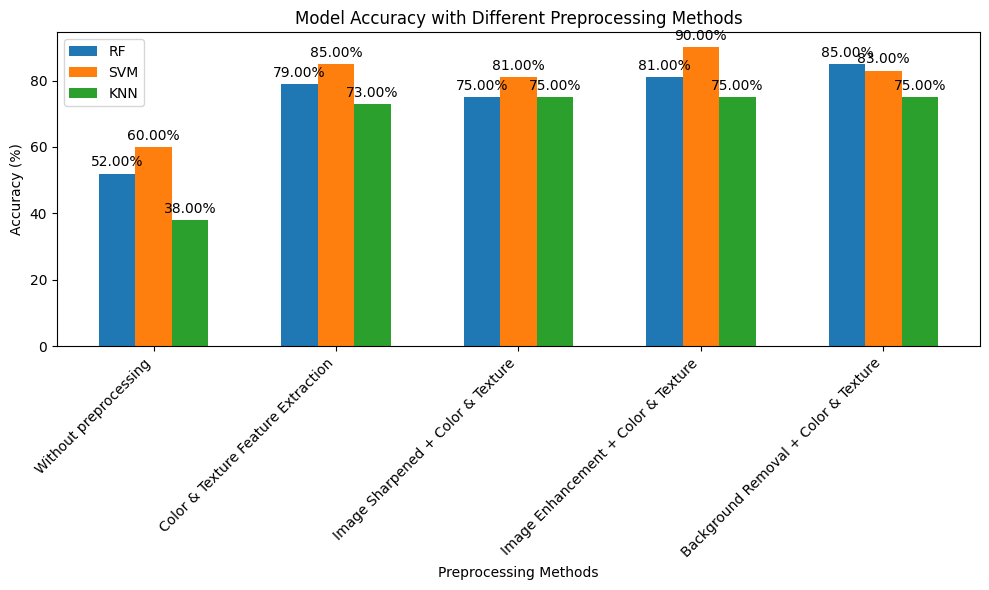

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['RF', 'SVM', 'KNN']
preprocessing_methods = [
    'Without preprocessing',
    'Color & Texture Feature Extraction',
    'Image Sharpened + Color & Texture',
    'Image Enhancement + Color & Texture',
    'Background Removal + Color & Texture'
]

accuracy = {
    'RF': [0.52, 0.79, 0.75, 0.81, 0.85],
    'SVM': [0.60, 0.85, 0.81, 0.90, 0.83],
    'KNN': [0.38, 0.73, 0.75, 0.75, 0.75]
}

# Convert accuracy to percentages
accuracy_percentage = {model: [val * 100 for val in acc] for model, acc in accuracy.items()}

# Plot
x = np.arange(len(preprocessing_methods))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, accuracy_percentage['RF'], width, label='RF')
rects2 = ax.bar(x, accuracy_percentage['SVM'], width, label='SVM')
rects3 = ax.bar(x + width, accuracy_percentage['KNN'], width, label='KNN')

# Add labels, title, and legend
ax.set_xlabel('Preprocessing Methods')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy with Different Preprocessing Methods')
ax.set_xticks(x)
ax.set_xticklabels(preprocessing_methods)
ax.legend()

# Auto-labels for the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show plot
plt.show()


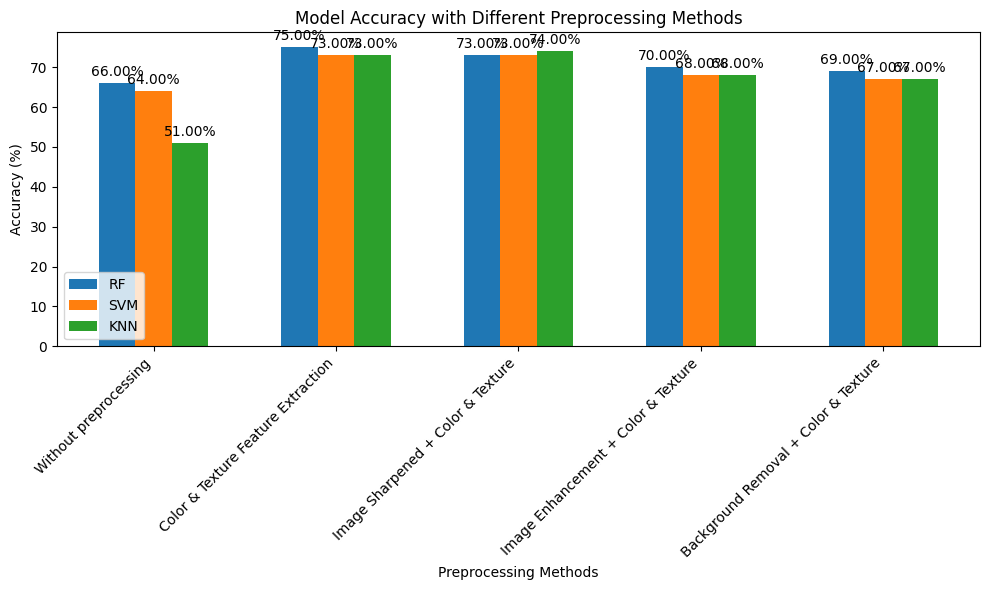

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['RF', 'SVM', 'KNN']
preprocessing_methods = [
    'Without preprocessing',
    'Color & Texture Feature Extraction',
    'Image Sharpened + Color & Texture',
    'Image Enhancement + Color & Texture',
    'Background Removal + Color & Texture'
]

accuracy = {
    'RF': [0.66, 0.75, 0.73, 0.70, 0.69],
    'SVM': [0.64, 0.73, 0.73, 0.68, 0.67],
    'KNN': [0.51, 0.73, 0.74, 0.68, 0.67]
}

# Convert accuracy to percentages
accuracy_percentage = {model: [val * 100 for val in acc] for model, acc in accuracy.items()}

# Plot
x = np.arange(len(preprocessing_methods))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, accuracy_percentage['RF'], width, label='RF')
rects2 = ax.bar(x, accuracy_percentage['SVM'], width, label='SVM')
rects3 = ax.bar(x + width, accuracy_percentage['KNN'], width, label='KNN')

# Add labels, title, and legend
ax.set_xlabel('Preprocessing Methods')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy with Different Preprocessing Methods')
ax.set_xticks(x)
ax.set_xticklabels(preprocessing_methods)
ax.legend()

# Auto-labels for the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show plot
plt.show()


In [4]:
import os
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Set paths
data_dir_train = "/content/drive/MyDrive/outfolder/outfolder/train"
data_dir_test = "/content/drive/MyDrive/self-collect-dataset/data"
labels_dict = {"Level1": 0, "Level2": 1, "Level3": 2}

# Feature extraction parameters
COLOR_BINS = 32
IMG_SIZE = (64, 64)  # Image resizing dimensions

def extract_features_with_background_removal(img, display_images):

    color_features = extract_color_histogram(img)
    texture_features = extract_texture_features(img)
    features = np.concatenate((color_features, texture_features))

    return features

# Extract color histogram features
def extract_color_histogram(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [COLOR_BINS, COLOR_BINS, COLOR_BINS], [0, 256, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Placeholder for texture feature extraction (can be extended)
def extract_texture_features(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img.flatten()[:COLOR_BINS]  # Simplified feature example

# Load and preprocess data using new feature extraction
def load_data_and_extract_features_improved(data_dir, display_images=False):
    X = []
    y = []

    for label_name, label_id in labels_dict.items():
        class_dir = os.path.join(data_dir, label_name)
        if not os.path.exists(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img_resized = cv2.resize(img, IMG_SIZE)

            features = extract_features_with_background_removal(img_resized, display_images)
            X.append(features)
            y.append(label_id)

    return np.array(X), np.array(y)

# Call function with display option
X_train, y_train = load_data_and_extract_features_improved(data_dir_train, display_images=False)
X_test, y_test = load_data_and_extract_features_improved(data_dir_test, display_images=False)

# Normalize features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train_pca, y_train)

# Predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.476
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.62      0.42        65
           1       0.63      0.52      0.57       106
           2       0.65      0.30      0.41        79

    accuracy                           0.48       250
   macro avg       0.53      0.48      0.47       250
weighted avg       0.56      0.48      0.48       250

